<a href="https://colab.research.google.com/github/Swapna-2025/Zomato/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following data contains more of 9, 000 rows and more than 20 columns which contains information about the Zomato service such as restaurants, locations, ratings, cuisines, pricing and many more. So in this solution, we will explore the data and make it ready for modeling.

# **1.$~~$Importing the necessary libraries for Exploratory Data Analysis (EDA):-**

The following libraries will be used for performing Exploratory Data Analysis (EDA) on the given zomato dataset...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from collections import Counter
sns.set(color_codes=True)

# **2.$~~$Loading Data into a Pandas DataFrame:-**

Loading data into a Pandas DataFrame is a crucial step in Exploratory Data Analysis (EDA). Since the dataset is in CSV format with comma-separated values, we can simply read it using Pandas, which efficiently handles the task...

In [2]:
from charset_normalizer import detect
with open('zomato.csv', 'rb') as file:
    raw_data = file.read()
    detected_encoding = detect(raw_data)['encoding']


df = pd.read_csv('zomato.csv', encoding=detected_encoding)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# To Read Top 5 Rows

df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# To read last 5 rows

df.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml█▒ Gurme,208,Istanbul,"Kemankeü¶ Karamustafa Paü¶a Mahallesi, R█▒ht█▒...",KarakĒ_y,"KarakĒ_y, Istanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A█¶ac█▒,208,Istanbul,"Koü¶uyolu Mahallesi, Muhittin ĒņstĒ_nda█¶ Cadd...",Koü¶uyolu,"Koü¶uyolu, Istanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Istanbul,"KuruĒ_eü¶me Mahallesi, Muallim Naci Caddesi, N...",KuruĒ_eü¶me,"KuruĒ_eü¶me, Istanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aü¶ü¶k Kahve,208,Istanbul,"KuruĒ_eü¶me Mahallesi, Muallim Naci Caddesi, N...",KuruĒ_eü¶me,"KuruĒ_eü¶me, Istanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,Istanbul,"Cafea█¶a Mahallesi, Bademalt█▒ Sokak, No 21/B,...",Moda,"Moda, Istanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [ ]:
# To Drop Irrelevant Columns

df.drop(['Longitude', 'Latitude', 'Switch to order menu', 'reviews_list'], axis=1, inplace=True,  errors='ignore')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# To Check The Type Of df

print(type(df))

<class 'pandas.core.frame.DataFrame'>


# **3.$~~$Checking Data Types of Each Columns:-**

It’s important to check the data types because sometimes values like the average cost, price range might be stored as text instead of numbers. If that happens, we need to convert them to integers to create graphs correctly. In this case, the data is already in the correct format, so no changes are needed...

In [ ]:
df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Cuisines,object
Average Cost for two,int64
Currency,object


In [ ]:
# Find if there is any missing values or not, if yes then handle those missing values

df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Cuisines,9
Average Cost for two,0
Currency,0


⚫$~~$ So, it is found that there is 9 missing values in column 'Cuisines'.Let's fix it...


In [ ]:
df.fillna(method='ffill', inplace=True)
df['Cuisines'].isna().sum()

<ipython-input-7-7d77b64420f1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


0

In [ ]:
# Find if there is any duplicate values or not

df.duplicated().sum()

0

* There is no duplicate values

In [ ]:
# To show basic statisticals characteristics of the data

df.describe()

,Restaurant ID,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,800000.000000,4.000000,4.900000,10934.000000


# **4.$~~$ See how aggregate rating has distributed :-**

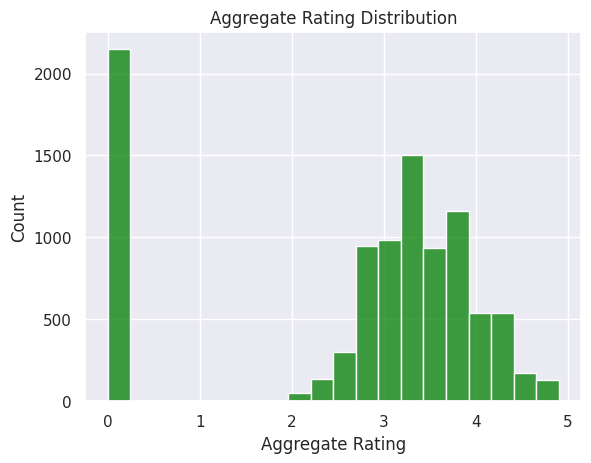

In [ ]:
sns.histplot(df['Aggregate rating'],color='green',bins=20)
plt.title('Aggregate Rating Distribution')
plt.xlabel('Aggregate Rating')
plt.show()

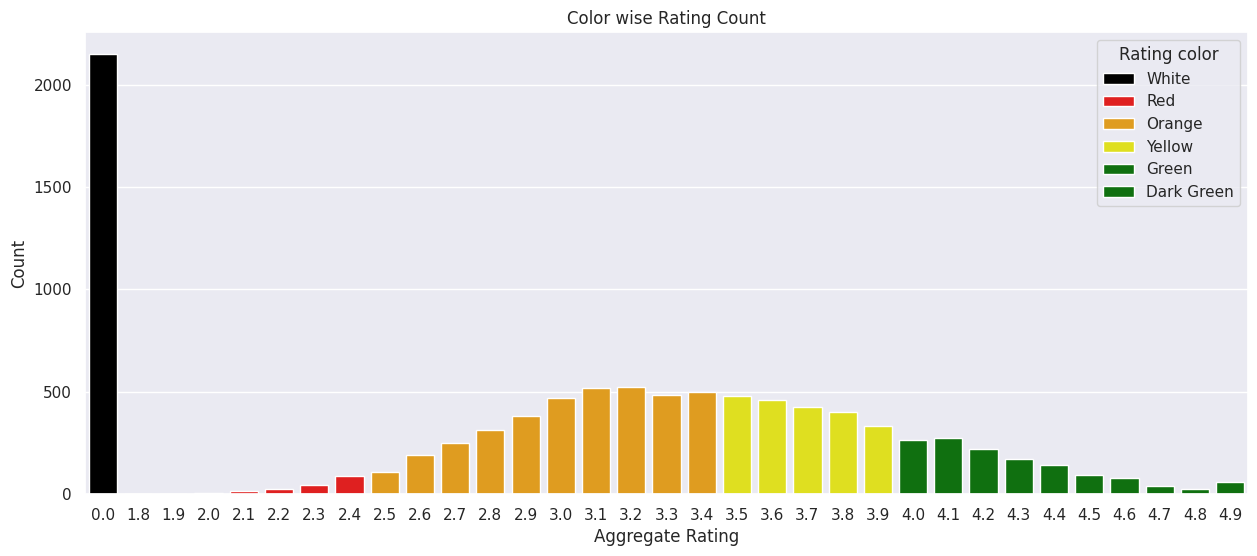

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Aggregate rating",hue="Rating color",data=df,palette=["black","red","orange","yellow","green","green"])
plt.title("Color wise Rating Count")
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Mean:", df['Aggregate rating'].mean())
print("Median:", df['Aggregate rating'].median())
print("Standard Deviation:", df['Aggregate rating'].std())

Mean: 2.66637001361114
Median: 3.2
Standard Deviation: 1.5163775396521686


⚫$~~$ ***Key Observation From 'Aggregate Rating Distribution' Histplot and It's Variability :-***

▶$~~$ The average rating of 2.67 suggests a moderate level of customer satisfaction overall.

▶$~~$ Almost 500 restaurants have got (3.1-3.2) ratings.

 ▶$~~$  The median being higher indicates that a larger portion of restaurants have ratings above the average.

 ▶$~~$ The standard deviation of 1.52 indicates that there's a decent amount of variety in customer experiences, with some restaurants receiving much higher or lower ratings than the average.

# **5.$~~$  Count of restaurants by rating text:-**

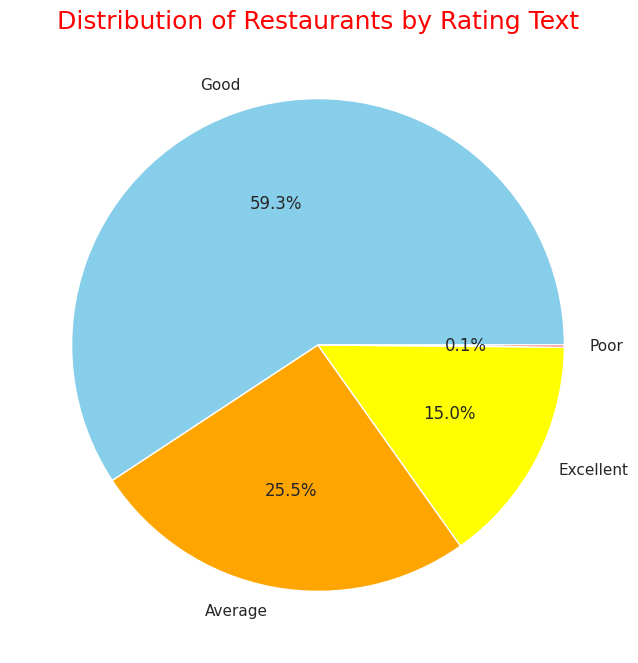

In [ ]:
df['Rating Text'] = pd.cut(df['Aggregate rating'], bins=[0, 2, 3, 4, 5],
                               labels=['Poor', 'Average', 'Good', 'Excellent'])
rating_counts = df['Rating Text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'yellow', 'red'])
plt.title('Distribution of Restaurants by Rating Text', color='red',fontsize=18 )
plt.show()

***⚫$~$Key Observation From 'Distribution of Restaurants by Rating Text'     Pieplot :-***

▶$~~$ A large portion of the restaurants fall into the "Good" or "Average" category which indicates that the experience of customers are positive.

▶$~~$ Some restaurants receive "Excellent" category rating.

▶$~~$ The overall distribution of ratings indicate a significant portion in the "Poor" category which suggests some restaurants need improvement.

# **6.$~~$ Count of restaurants by price range:-**

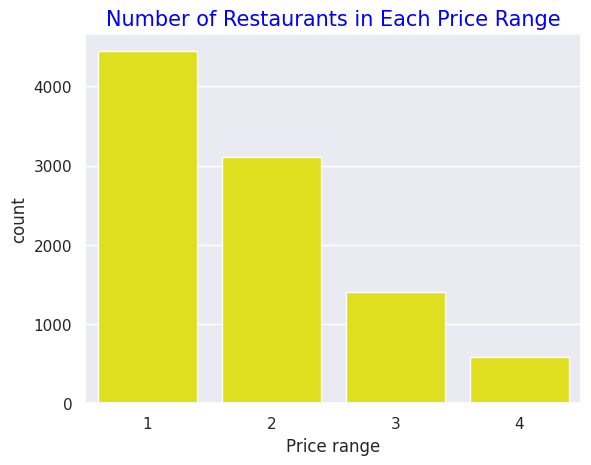

In [ ]:
sns.countplot(x='Price range',color='yellow', data=df)
plt.title("Number of Restaurants in Each Price Range",color='blue', fontsize=15)
plt.show()

***⚫$~$Key Observation From "Number of Restaurants in Each Price Range" Countplot:-***

▶$~~$ The majority of restaurants around (4800) fall under Price Range 1, meaning budget-friendly options are the most common.

▶$~~$ As the price range increases, the number of restaurants drops significantly.

▶$~~$ Very few restaurants around (600) belong to Price Range 4, suggesting high-end dining is less prevalent.

# **7.$~~$ 'Cost for two' wise restaurant count:-**

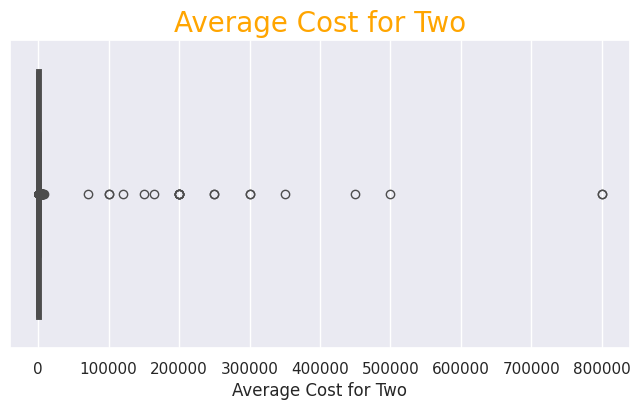

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Average Cost for two"],linewidth=3.5,color="blue")
plt.title("Average Cost for Two", color='orange',fontsize=20)
plt.xlabel("Average Cost for Two")
plt.show()

***⚫$~$Key Observation From "Average Cost for Two" Boxplot:-***

▶$~~$ Here the median value is at or near (0), it means a substantial number of restaurants are offering free meals or extremely low-cost options for two people.

▶$~~$ The outlier at (800000) indicates that some restaurants are very expensive for two people.

# **8.$~~$ Information about cheapest and expensive restaurants:-**

In [ ]:
## Let's see which restaurants are cheapest and which are expensive...

min_cost = df["Average Cost for two"].min()
max_cost = df["Average Cost for two"].max()
cheapest_restaurants = df[df["Average Cost for two"] == min_cost][["Restaurant Name", "City", "Average Cost for two"]]
expensive_restaurants = df[df["Average Cost for two"] == max_cost][["Restaurant Name", "City", "Average Cost for two"]]
print("Restaurants with the Lowest Average Cost for Two:")
print(cheapest_restaurants)
print("Restaurants with the Highest Average Cost for Two:")
print(expensive_restaurants)


Restaurants with the Lowest Average Cost for Two:
                     Restaurant Name       City  Average Cost for two
84                     Cookie Shoppe     Albany                     0
85     El Vaquero Mexican Restaurant     Albany                     0
87    Pearly's Famous Country Cookng     Albany                     0
201                         Deorio's   Columbus                     0
240                           Azteca  Davenport                     0
277    Happy Joe's Pizza & Ice Cream    Dubuque                     0
346             HI Lite Bar & Lounge     Miller                     0
397                      Royal Hotel  Pocatello                     0
407                    Senor Iguanas  Pocatello                     0
634      The Latitude - Radisson Blu       Agra                     0
637                  Sheroes Hangout       Agra                     0
639                   Chapter 1 Cafe       Agra                     0
677                   The BrewMaster  Al

*  $~~$ So, It's found that there are many restaurants in different cities provide complementary food and Jakarta City has two very expensive restaurant.

# **9.$~~$ Price range wise rating count:- :-**

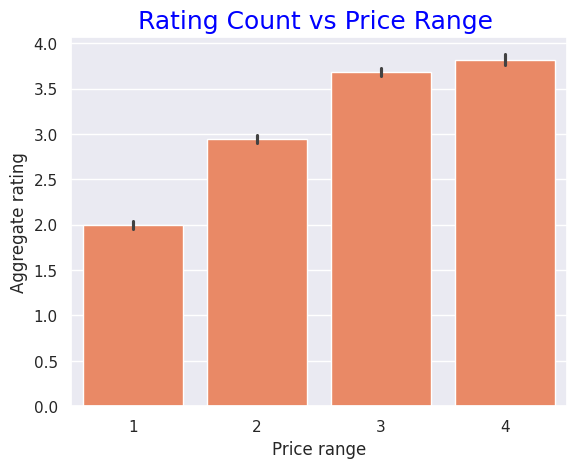

In [ ]:
sns.barplot(x='Price range', y='Aggregate rating',color='coral', data=df)
plt.title('Rating Count vs Price Range ', color='blue', fontsize=18)
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.show()

***⚫$~~$Key Observation From 'Rating Count vs Price Range' barplot:-***

▶$~~$As the price range increases, the aggregate rating also increases. Price range 3 and 4 have significantly higher ratings, around (3.7 to 4.0) which indicates that customers generally perceive higher-priced establishments more favorably.

▶$~~$The lowest price range (1) has the lowest aggregate rating, around 2.0. This may indicate that lower-priced establishments might not meet customer's expectations in terms of quality, service, or experience.

# **10.$~~$ Rating based on online order:-**

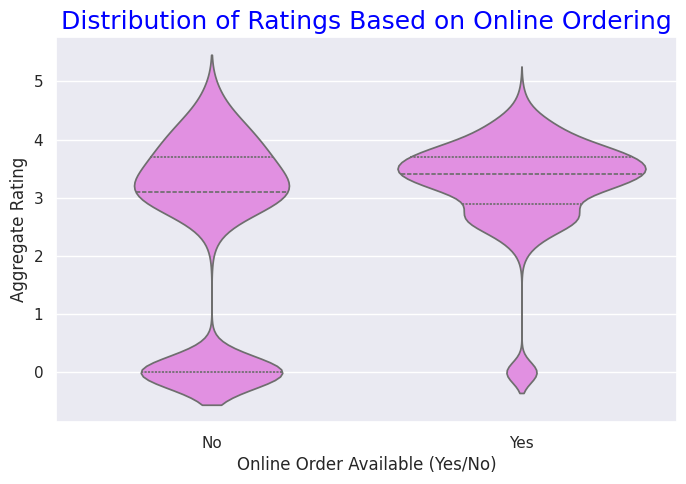

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Has Online delivery', y='Aggregate rating', inner='quartile', color='violet')
plt.title("Distribution of Ratings Based on Online Ordering", color='blue', fontsize=18)
plt.xlabel("Online Order Available (Yes/No)")
plt.ylabel("Aggregate Rating")
plt.show()


***⚫$~~$ Key Observation From "Distribution of Ratings Based on Online Ordering" Violinplot:-***

▶$~~$Which restaurants have online delivery facility  have got higher ratings.
      People are satisfied with online delivery system.

# **11.$~~$ Rating based on table booking facility:-**

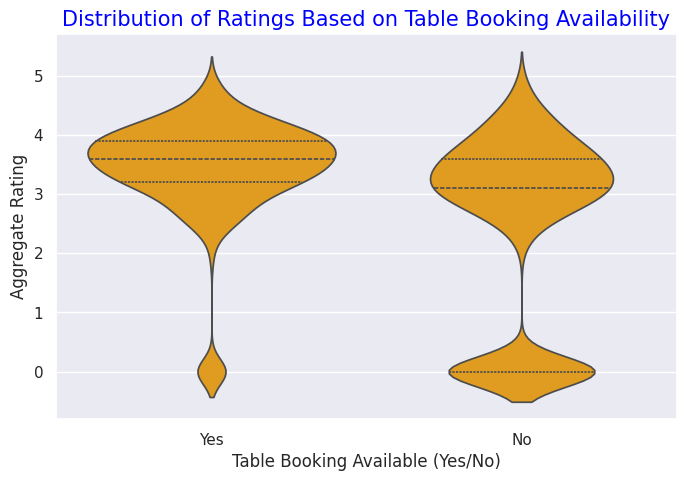

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Has Table booking', y='Aggregate rating', inner='quartile', color='orange')
plt.title("Distribution of Ratings Based on Table Booking Availability", color='blue', fontsize=15)
plt.xlabel("Table Booking Available (Yes/No)")
plt.ylabel("Aggregate Rating")
plt.show()


***⚫$~~$ Key Observation from "Distribution of Ratings Based on Table Booking Availability" Violinplot:-***

▶$~~$ Restaurants that offer table booking tend to have higher aggregate ratings compared to those that do not.

▶$~~$ This suggests that customers generally perceive restaurants with table booking more favorably, potentially associating them with better service, quality, or overall experience.

# **12.$~~$ Comparision between 'Aggregate rating', 'Price range' and 'Votes':-**

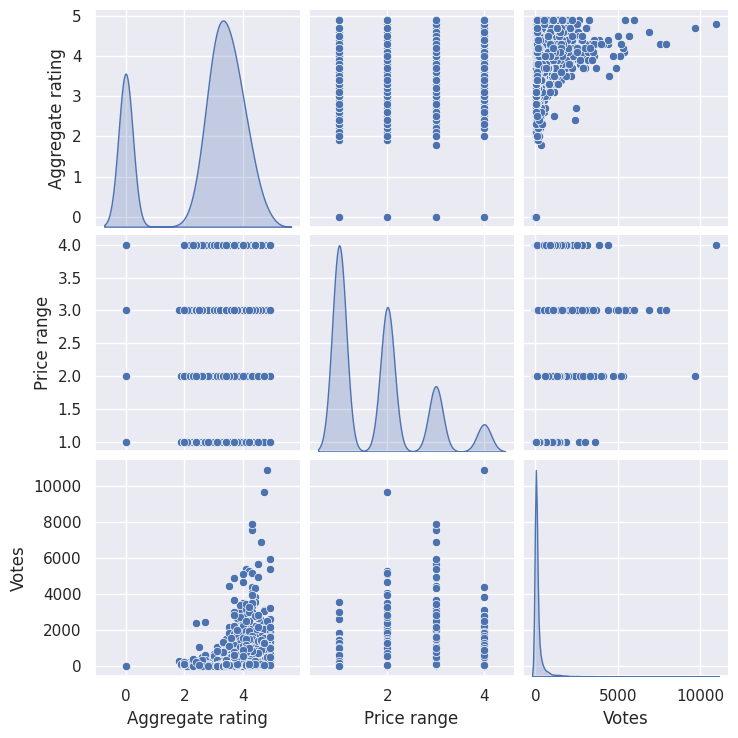

In [ ]:
sns.pairplot(df[['Aggregate rating', 'Price range', 'Votes']], diag_kind='kde')
plt.show()

***⚫$~~$ Key Observation From This Pairplot:-***

▶$~~$ The scatter plot between Price range and Aggregate rating likely shows an upward trend, indicating that higher-priced restaurants tend to receive higher ratings.

▶$~~$ The scatter plot of Votes vs. Aggregate rating indicates that restaurants with higher ratings have more votes.

▶$~~$ The Votes vs. Price range scatter plot indicates a high variance, meaning that expensive restaurants don’t always have the most votes, some low-price restaurants also receive many votes.

▶$~~$ KDE plot of Aggregate rating indicates that at (4-5) rating the concentration of restaurants is high.

▶$~~$ KDE plot of Price range reveals the frequency of restaurants falling into different price categories.Price range(4. 0) indicates more restaurants in that category.

▶$~~$ KDE plot of distribution of Votes visualizes how many votes restaurants typically receive. A higher peak at a certain number of votes indicates that many restaurants receive a similar number of votes.

# **13.$~$ Relation between 'Average Cost for two', 'Aggregate rating', 'Votes' and 'Price range':-**

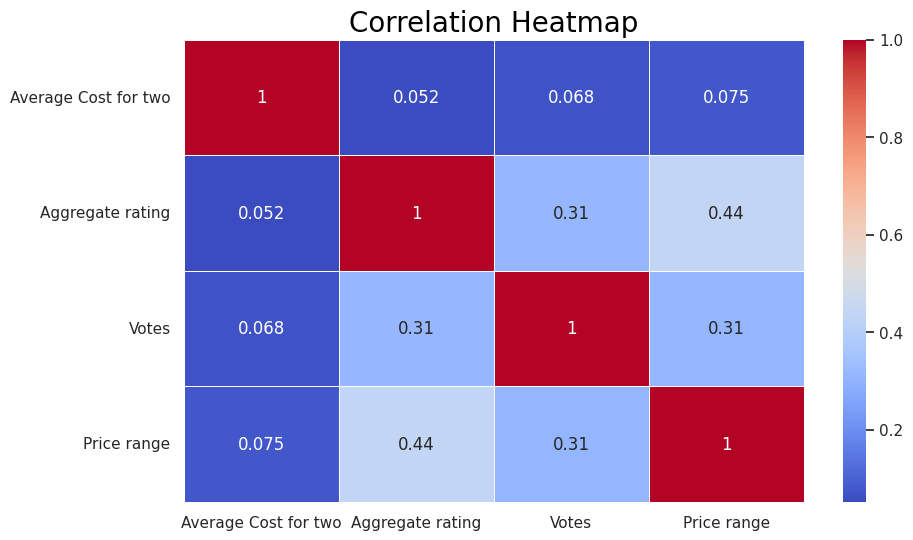

In [ ]:
numerical_features =['Average Cost for two', 'Aggregate rating', 'Votes', 'Price range']
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap', color='black', fontsize=20)
plt.show()

***⚫$~~$ Key Observation From This Heatmap:-***

▶$~~$ Positive Correlation between Price range and Average Cost for two is the strongest positive correlation (0.85) in the heatmap. It indicates that as the price range of a restaurant increases, the average cost for two people also tends to increase. This is quite intuitive and expected.

▶$~~$Price/Cost and Rating indicate that higher-priced restaurants tend to have slightly better ratings, but price isn't the sole determinant of customer satisfaction.

▶$~~$ Restaurants with more votes (potentially more popular) also tend to have higher ratings.

# **14.$~~$ Count of cuisine type according to restaurant:-**

In [4]:
# In restaurant basis

cuisine_list = df["Cuisines"].dropna().str.split(", ")
cuisine_counter = Counter([c for sublist in cuisine_list for c in sublist])
cuisine_df = pd.DataFrame(cuisine_counter.items(), columns=["Cuisine", "Count"]).sort_values(by="Count", ascending=False)
cuisine_df

,Cuisine,Count
81,North Indian,3960
9,Chinese,2735
19,Fast Food,1986
82,Mughlai,995
15,Italian,764
...,...,...
131,Fish and Chips,1
120,Malwani,1
121,Cuisine Varies,1
67,Soul Food,1


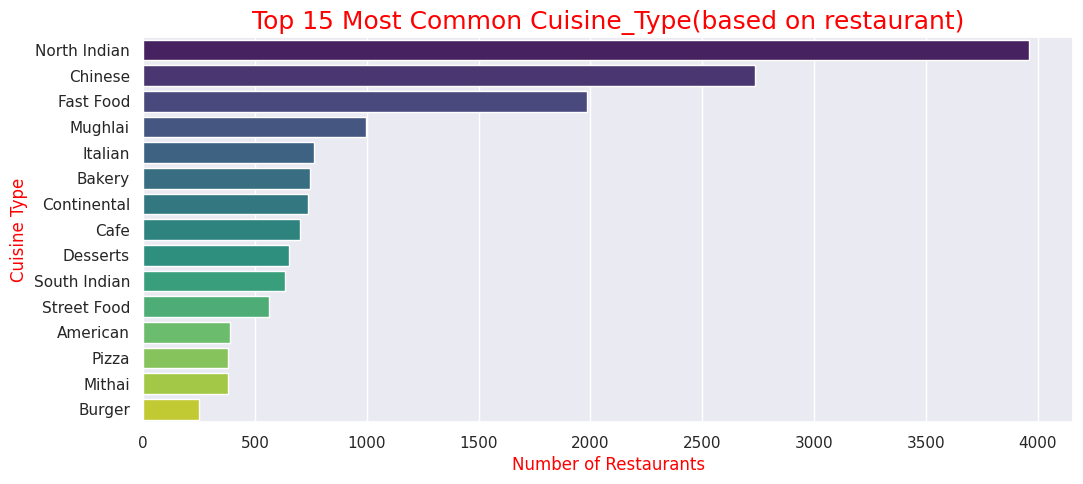

In [6]:
plt.figure(figsize=(12, 5))
sns.barplot(x=cuisine_df["Count"][:15], y=cuisine_df["Cuisine"][:15], hue=cuisine_df["Cuisine"][:15], palette="viridis", dodge=False, legend=False)  # Set hue and legend=False
plt.title("Top 15 Most Common Cuisine_Type(based on restaurant)", color='red', fontsize=18)
plt.xlabel("Number of Restaurants", color='red')
plt.ylabel("Cuisine Type", color='red')
plt.show()

 ⚫$~~$ ***Key observation from "Top 15 Most Common Cuisines_Type" barplot:-***

▶$~~$ In cuisines North Indian category has listed the maximum part of the restaurants- 3960

▶$~~$ Burger has in few restaurants around 8-10

# **15.$~~$ Distribution of rating on cuisines:-**

In [7]:
# According to aggregate rating

df_exploded = df.assign(Cuisines=df["Cuisines"].str.split(", ")).explode("Cuisines")
cuisine_ratings = df_exploded.groupby("Cuisines")["Aggregate rating"].mean()
top_15_cuisines = cuisine_ratings.sort_values(ascending=False).head(15)
top_15_cuisines


,Aggregate rating
Cuisines,
Sunda,4.900000
BĒ_rek,4.700000
Taiwanese,4.650000
Ramen,4.500000
Dim Sum,4.466667
Hawaiian,4.412500
DĒ_ner,4.400000
Bubble Tea,4.400000
Curry,4.400000


▶$~~$ **So, cuisine 'Sunda' has got maximum rating-4.9**

# **16.$~~$ Let's see where the most famous cuisine is available:-**

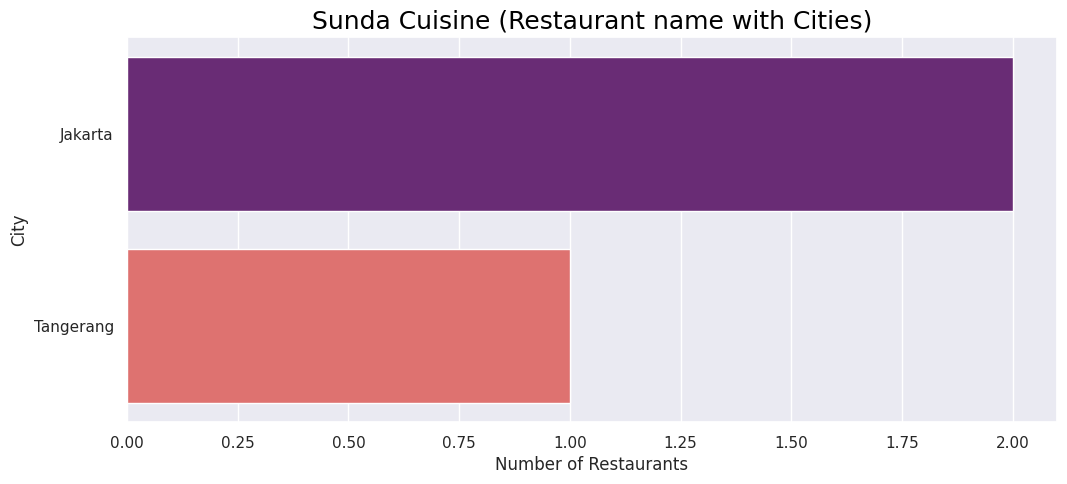

,Restaurant Name,City,Cuisines
9279,Talaga Sampireun,Jakarta,"Sunda, Indonesian"
9291,Talaga Sampireun,Jakarta,"Sunda, Indonesian"
9296,Talaga Sampireun,Tangerang,"Sunda, Indonesian"


In [8]:
# Let's see where we will get this most famous 'Sunda' cuisine

df = df.dropna(subset=["Cuisines"])
sunda_df = df[df["Cuisines"].str.contains("Sunda", case=False, na=False)]
sunda_city_counts = sunda_df["City"].value_counts()
if not sunda_city_counts.empty:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=sunda_city_counts.values, y=sunda_city_counts.index, hue=sunda_city_counts.index, palette="magma", dodge=False, legend=False)
    plt.title("Sunda Cuisine (Restaurant name with Cities)", color='black',fontsize=18)
    plt.xlabel("Number of Restaurants")
    plt.ylabel("City")
    plt.show()
else:
    print("No restaurants found serving Sunda cuisine.")
sunda_df[["Restaurant Name", "City", "Cuisines"]].head(10)

⚫$~~$ **Let's Analyse Mumbai,**

In [ ]:
M = df[(df.City == 'Mumbai')]
M.head(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2480,35217,Joey's Pizza,1,Mumbai,"6 & 7, Upvan Building, Near Indian Oil Colony,...",Azad Nagar,"Azad Nagar, Mumbai",72.829976,19.126630,Pizza,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,5145
2481,18447068,Cafe Hydro,1,Mumbai,"Esspee Tower, Rajendra Nagar, Dattapada Road, ...",Borivali East,"Borivali East, Mumbai",72.862381,19.221315,Asian,...,Indian Rupees(Rs.),No,No,No,No,3,4.0,Green,Very Good,156
2482,18458563,The American Joint,1,Mumbai,"The Ahcl Homes Tower, Chikuwadi New Link Road,...",Borivali West,"Borivali West, Mumbai",72.841347,19.223840,"Healthy Food, American, Burger, Salad",...,Indian Rupees(Rs.),Yes,No,No,No,2,3.4,Orange,Average,170
2483,18075122,The Fusion Kitchen,1,Mumbai,"Shop 1, Opposite Veda Building, Near Bhavdevi ...",Borivali West,"Borivali West, Mumbai",72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.7,Dark Green,Excellent,2083
2484,18233317,145 Kala Ghoda,1,Mumbai,"145, Kala Ghoda, Fort, Mumbai",Fort,"Fort, Mumbai",72.832585,18.927584,"Fast Food, Beverages, Desserts",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,1606
2485,18237753,Tea Villa Cafe,1,Mumbai,"31, Opposite Globus, Hill Road, Bandra West","Hill Road, Bandra West","Hill Road, Bandra West, Mumbai",72.833984,19.055831,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2040
2486,18388642,Grandmama's Cafe,1,Mumbai,"Hotel Royal Garden, Ground Floor, Juhu Tara Ro...",Juhu,"Juhu, Mumbai",72.827808,19.091458,"Continental, Italian",...,Indian Rupees(Rs.),No,No,No,No,3,3.8,Yellow,Good,617
2487,18463285,Mumbai Vibe,1,Mumbai,"Ganga Jamuna Block, 14th Road, Linking Road, B...","Linking Road, Bandra West","Linking Road, Bandra West, Mumbai",72.832658,19.065838,"Cafe, Continental, North Indian, Italian, Chin...",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.8,Yellow,Good,146
2488,16527711,The Rolling Pin,1,Mumbai,"12, Janta Industrial Estate, Senapat Bapat Roa...",Lower Parel,"Lower Parel, Mumbai",72.825203,18.994049,"Bakery, Desserts, Cafe",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.9,Yellow,Good,2076
2489,18313566,Farzi Cafe,1,Mumbai,"Kamala Mills, Near Radio Mirchi Office, Lower ...",Lower Parel,"Lower Parel, Mumbai",72.827650,19.003517,Modern Indian,...,Indian Rupees(Rs.),No,No,No,No,3,4.3,Green,Very Good,1240


# **17.$~~$ In Mumbai which restaurants have table booking facility:-**

In [ ]:
fig = px.bar(M,x=M.Locality,
color=M['Has Table booking'],
title='Restaurants having table booking and its count for Mumbai')
fig.update_layout(bargap=0.1)
fig.show()

▶$~~$ In Mumbai at 'Lower Parel'  no table booking facility is present.

# **18.$~~$ Cuisines diversity in Mumbai:-**

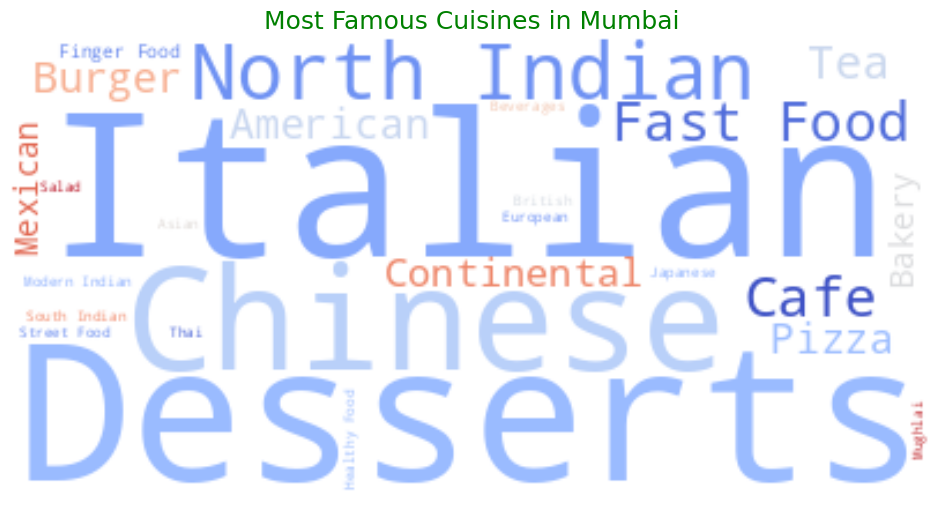

In [ ]:
# Famous cuisines in Mumbai

mumbai_df = df[df["City"].str.contains("Mumbai", case=False, na=False)]
mumbai_cuisine_list = mumbai_df["Cuisines"].dropna().str.split(", ")
mumbai_cuisine_counter = Counter([c for sublist in mumbai_cuisine_list for c in sublist])
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=400, height=200, background_color="white", colormap="coolwarm").generate_from_frequencies(mumbai_cuisine_counter)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Famous Cuisines in Mumbai", color='green', fontsize=18)
plt.show()

⚫$~~$ ***Key observation from this wordcloud:-***

▶$~~$ Most popular cuisines in Mumbai are 'Italian', 'Desserts', 'Chinese', 'North indian' 'Fast Food'.

▶$~~$ Continental and Mexican cuisines show Mumbai’s diverse food culture.

▶$~~$  Café-style and healthy food options like Salad and Juices are also present.

▶$~~$ Street food & fusion dishes (e.g., Rolls, Burgers, Sandwiches) are also common.

▶$~~$ This analyze will also help visitors who want to explore 'Mumbai'.

⚫$~~$ **Let's Analyse Kolkata,**

In [ ]:
k = df[(df.City == 'Kolkata')]
k.head(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Rating Text
2398,18217475,Asia Kitchen by Mainland China,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata","Asian, Chinese",1400,Indian Rupees(Rs.),No,Yes,No,3,4.6,Excellent,945,Excellent
2399,18249144,Hoppipola,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata","Italian, Mexican, American, Mediterranean",1200,Indian Rupees(Rs.),No,Yes,No,3,4.2,Very Good,1103,Excellent
2400,18017612,Spice Kraft,1,Kolkata,"54/1/2A, Hazra Road, Ballygunge Phari, Near Ha...",Ballygunge,"Ballygunge, Kolkata","Continental, Middle Eastern, Asian",1200,Indian Rupees(Rs.),No,No,No,3,4.8,Excellent,1424,Excellent
2401,18377112,Nawwarah,1,Kolkata,"48A, Syed Amir Ali Avenue, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata","Chinese, Cafe, North Indian, Desserts",1000,Indian Rupees(Rs.),No,No,No,3,3.9,Good,326,Good
2402,20002,6 Ballygunge Place,1,Kolkata,"6, Ballygunge Place, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",Bengali,1000,Indian Rupees(Rs.),Yes,Yes,No,3,4.4,Very Good,1778,Excellent
2403,18343731,Mumbai Local,1,Kolkata,"19, Ballygunge Park Road, Near Quest Mall, Bal...",Ballygunge,"Ballygunge, Kolkata","North Indian, Chinese, Street Food",1200,Indian Rupees(Rs.),Yes,No,No,3,4.2,Very Good,704,Excellent
2404,25664,Gabbar's Bar & Kitchen,1,Kolkata,"11/1, Ho Chi Minh Sarani, Camac Street Area, K...",Camac Street Area,"Camac Street Area, Kolkata","North Indian, Chinese, Mexican, Italian",1400,Indian Rupees(Rs.),Yes,No,No,3,4.4,Very Good,1484,Excellent
2405,25587,TGI Friday's,1,Kolkata,"Forum Mall, 10/3, Elgin Road, Elgin, Kolkata",Elgin,"Elgin, Kolkata","Tex-Mex, American",1800,Indian Rupees(Rs.),Yes,Yes,No,3,4.0,Very Good,911,Good
2406,24530,Santa's Fantasea,1,Kolkata,"9, Ballygunge Terrace, Near Anjali Jewellers, ...",Golpark,"Golpark, Kolkata","Seafood, Chinese",800,Indian Rupees(Rs.),No,No,No,2,4.2,Very Good,2584,Excellent
2407,20747,India Restaurant,1,Kolkata,"Ground Floor, 1st Floor, 2nd Floor, 34, Karl M...",Kidderpore,"Kidderpore, Kolkata","Biryani, North Indian, Chinese, Mughlai",800,Indian Rupees(Rs.),Yes,Yes,No,2,4.6,Excellent,1219,Excellent


# **19.$~~$ In Kolkata which restaurants provide table booking facility:-**

In [ ]:
fig = px.bar(k,x=k.Locality,
color=k['Has Table booking'],
title='Restaurants having table booking and its count for Kolkata')
fig.update_layout(bargap=0.1)
fig.show()

▶$~~$We can observe that the restaurant of Park Street Area has no table booking facility.

# **20.$$~$ Cuisines diversity in Kolkata:-**

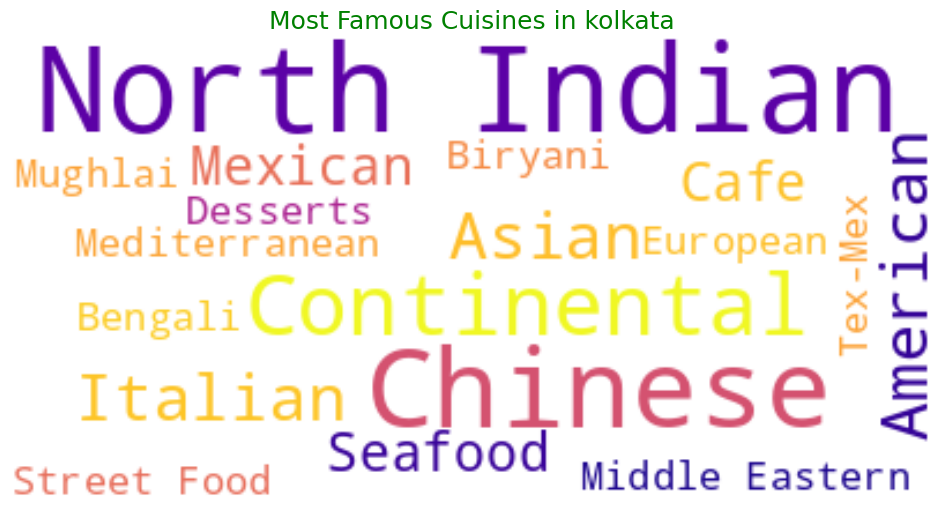

In [ ]:
# Famous cuisines in kolkata

kolkata_df = df[df["City"].str.contains("kolkata", case=False, na=False)]
kolkata_cuisine_list = kolkata_df["Cuisines"].dropna().str.split(", ")
kolkata_cuisine_counter = Counter([c for sublist in kolkata_cuisine_list for c in sublist])
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=400, height=200, background_color="white", colormap="plasma").generate_from_frequencies(kolkata_cuisine_counter)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Famous Cuisines in kolkata", color='green', fontsize=18)
plt.show()

⚫$~~$ ***Key observation from this wordcloud:-***

▶$~~$ North Indian, Chinese, and Bengali cuisines are the most prominent, indicating they dominate Kolkata’s restaurant scene.


▶$~~$ Mughlai and Fast Food are also quite popular, reflecting Kolkata's love for biryanis and street food.


▶$~~$ Continental and Italian cuisines suggest a growing preference for global flavors.

 ⬛**$~~$ Final Inferences and Conclusions:-**

 I’ve drawn many inferences from the survey.
 Here’s a summary of a few of them:

 ✅ Ratings are skewed towards the positive side, indicating generally satisfied customers.

✅ Price range significantly influences customer ratings, with higher-priced options receiving better feedback.

✅ Online ordering and table booking features are associated with higher customer satisfaction.

✅ Budget-friendly restaurants are the most prevalent, with higher-priced options being less common.

✅ Average cost for two shows a wide range, including both very affordable and expensive options.

✅ Customer engagement, measured by votes, correlates with higher ratings and popularity.

✅ Cuisine ratings reveal variations in customer preferences, with some cuisines receiving consistently higher scores.

✅ The dataset reflects diverse restaurant offerings across different cities and price ranges.